# Metody Obliczeniowe w Nauce i Technice Laboratorium 2
## Rozwiazywanie układów równan liniowych
### Paweł Gorgolewski

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy.linalg.linalg import LinAlgError

## 1. Metoda Gaussa-Jordana

##### Full-pivoting Gauss-Jordan

In [2]:
def full_pivoting(A: np.array, B: np.array, min_id: int, curr_col_order: list):
    n = A.shape[0]
    max_row_id, max_col_id = np.unravel_index(np.abs(A[min_id:, min_id:]).argmax(), [n-min_id, n-min_id])
    max_row_id += min_id
    max_col_id += min_id

    if max_row_id != min_id:
        #lets, change rows
        A[[min_id, max_row_id]], B[[min_id, max_row_id]] = A[[max_row_id, min_id]], B[[max_row_id, min_id]]

    if max_col_id != min_id:
        #lets change cols
        A[:, [min_id, max_col_id]] = A[:, [max_col_id, min_id]]

    #scaling
    scaling_val = A[min_id, min_id]
    A[min_id] /= scaling_val
    B[min_id] /= scaling_val

    curr_col_order.append((min_id, max_col_id))

def gauss_jordan_full_pivoting(A: np.array, B: np.array):
    n = A.shape[0]
    if n < A.shape[1]:
        print("Too many unknows")
        return None

    A_copy, B_copy = np.copy(A), np.copy(B)
    permutations = list()
    for i in range(n):
        full_pivoting(A_copy, B_copy, i, permutations) #Reshape A i B to get the piwot at the top
        pivot = A_copy[i,i]
        for j in range(n):
            if j==i: 
                continue
            
            m = A_copy[j,i]/pivot
            A_copy[j] = np.subtract(A_copy[j], A_copy[i]*m)
            B_copy[j] = np.subtract(B_copy[j], B_copy[i]*m)

    for i in range(n):
        B_copy[i] /= A_copy[i,i]

    #Now we have results in B but without a proper order
    while permutations:
        i, j = permutations.pop()
        B_copy[[j, i]] = B_copy[[i, j]]

    return B_copy

##### Partial-pivoting Gauss-Jordan

In [3]:
def partial_piwoting(A: np.array, B: np.array, row_id: int):
    n = A.shape[0]
    max_row_id, max_col_id = np.unravel_index(np.abs(A[row_id:, row_id]).argmax(), [n-row_id, 1])
    max_row_id += row_id

    if max_row_id != row_id:
        #lets, change rows
        A[[row_id, max_row_id]], B[[row_id, max_row_id]] = A[[max_row_id, row_id]], B[[max_row_id, row_id]]

    #scaling
    scaling_val = A[row_id, row_id]
    A[row_id] /= scaling_val
    B[row_id] /= scaling_val

    return A,B

def gauss_jordan(A: np.array, B: np.array):
    n = A.shape[0]
    A_copy, B_copy = np.copy(A), np.copy(B)

    if n < A_copy.shape[1]:
        print("Too many unknows")
        return None

    for i in range(A.shape[1]):
        partial_piwoting(A_copy, B_copy, i) #Reshape A i B to get the piwot at the top
        pivot = A_copy[i,i]

        for j in range(n):
            if j==i:
                continue

            m = A_copy[j,i]/pivot
            A_copy[j] = np.subtract(A_copy[j], A_copy[i]*m)
            B_copy[j] = np.subtract(B_copy[j], B_copy[i]*m)

    for i in range(n):
        B_copy[i] = B_copy[i]/A_copy[i,i]

    return B_copy

##### Funkcja testująca
Test sprawdzający obie metody, zwracający czasy działania w przypadku poprawności algorytmów

In [4]:
def test_gauss_jordan(size: int):
    np.random.seed(10)
    matrix = np.random.random((size, size))
    results = np.random.random((size, 1))
    time_res = dict()

    start = time.time()
    part = gauss_jordan(matrix, results)
    time_res["part"] = time.time() - start

    start = time.time()
    full = gauss_jordan_full_pivoting(matrix, results)
    time_res["full"] = time.time() - start

    start = time.time()
    res = np.linalg.solve(matrix, results)
    time_res["numpy"] = time.time() - start

    print(f"MATRIX SIZE: {size}")

    print(f"TIMES: partial_pivot: {time_res['part']}, full_pivot: {time_res['full']}, numpy_linalg_solve: {time_res['numpy']}")
    np.testing.assert_allclose(res, full)
    print(f"Full pivoting works fine with size")

    np.testing.assert_allclose(part, res)
    print(f"Partial pivoting works fine with size\n")

    return time_res

##### Testy

Sprawdzenie poprawności zarówno dla `partial_pivoting` jak i `full_pivoting` wraz z wykresem zależności czasu od wielkości macierzy:

In [5]:
result = dict()

for i in range(20):
    tested_size = 50 + 50*i
    result[tested_size] = test_gauss_jordan(tested_size)

MATRIX SIZE: 50
TIMES: partial_pivot: 0.0249326229095459, full_pivot: 0.01995086669921875, numpy_linalg_solve: 0.001995563507080078
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 100
TIMES: partial_pivot: 0.08576226234436035, full_pivot: 0.0937497615814209, numpy_linalg_solve: 0.030918121337890625
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 150
TIMES: partial_pivot: 0.21253395080566406, full_pivot: 0.19748973846435547, numpy_linalg_solve: 0.01695394515991211
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 200
TIMES: partial_pivot: 0.30820322036743164, full_pivot: 0.3181428909301758, numpy_linalg_solve: 0.004625082015991211
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 250
TIMES: partial_pivot: 0.48072123527526855, full_pivot: 0.47860026359558105, numpy_linalg_solve: 0.004612922668457031
Full pivoting works fine with size
Part

##### Wykres czasu od wielkości macierzy

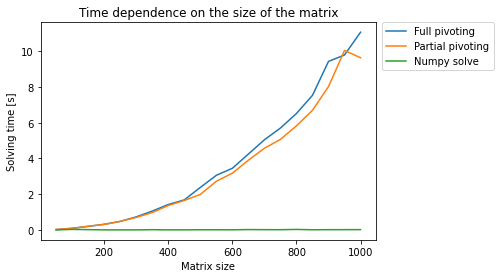

In [6]:
def create_time_plot(times):
    N = list(times.keys())

    full_piv = [times[n]['full'] for n in N]
    part_piv = [times[n]['part'] for n in N]
    numpy = [times[n]['numpy'] for n in N]

    plt.plot(N, full_piv)
    plt.plot(N, part_piv)
    plt.plot(N, numpy)
    plt.legend(['Full pivoting', 'Partial pivoting', 'Numpy solve'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('Matrix size')
    plt.ylabel('Solving time [s]')
    plt.title(f"Time dependence on the size of the matrix")
    plt.show()

create_time_plot(result)

Wnioski:
1. Algorytm jest poprawny -> nie pojawił się żaden *AssertioError* podczas obliczeń
2. Poprzez zastosowanie operacji z biblioteki numpy, `full pivoting` jest tylko nieznacznie wolniejszy od `partial pivotingu`
3. Wykresy są bardzo widocznymi, krzywymi łamanymi z powodu dość dużego `step'u` -> każda kolejna iteracja to macierz posiadająca o 50 więcej zarówno kolumn jak i wierszy

## 2. Faktoryzacja LU

##### Funkcje dokonujące faktoryzacji

In [7]:
def LU_factorization(A: np.array):
    LU = A.copy()
    n = LU.shape[0]

    for i in range(n):
        if LU[i,i] == 0: continue

        for j in range(i+1,n):
            scaling = LU[j,i]/LU[i,i]
            LU[j, i+1:] -=  scaling * LU[i, i+1:]
            LU[j, i] = scaling

    return LU

def get_L_and_U(LU):
    n = LU.shape[0]
    L = np.eye(n,n)
    U = np.zeros((n, n))
    for i in range(n):
        U[i, i:] = LU[i,i:]
        L[i, :i] = LU[i, :i]

    return L, U

##### Funkcja testująca wynik:

In [8]:
def test_factorization(A):
    L,U = get_L_and_U(LU_factorization(A))
    np.testing.assert_almost_equal(np.linalg.norm(A - (L @ U)), 0)
    print(f"Test PASSED for matrix with shape: {A.shape}")

##### Testy

In [9]:
for n in range(50,501, 50):
    np.random.seed(150)
    test_factorization(np.random.random((n,n)))

Test PASSED for matrix with shape: (50, 50)
Test PASSED for matrix with shape: (100, 100)
Test PASSED for matrix with shape: (150, 150)
Test PASSED for matrix with shape: (200, 200)
Test PASSED for matrix with shape: (250, 250)
Test PASSED for matrix with shape: (300, 300)
Test PASSED for matrix with shape: (350, 350)
Test PASSED for matrix with shape: (400, 400)
Test PASSED for matrix with shape: (450, 450)
Test PASSED for matrix with shape: (500, 500)


Testy wykazały poprawność rozwiązania. Plegały one na przyrównaniu $|| A - LU ||$ do 0.
Warto zaznaczyć, że faktoryzacja działa w miejscu - cały czas wykonuje obliczania na tej samej macierzy.

# 3. Analiza obwodu elektrycznego - nadokreslony układ równan

### Funkcja wczutująca dane z pliku:

In [10]:
import re
from collections import namedtuple
import networkx as nx

GraphInfo = namedtuple("GraphInfo", ["nxDiGraph", "SEM"])
SEM = namedtuple('SEM', ['s', 't', 'U'])
def parse_graph_date(file_name='graphs.txt'):
    graphs = dict()
    with open(file_name) as f:
        iterator = iter(f.readlines())
        line = next(iterator, None)
        while line:
            name_match = re.match("\[(?P<graph_name>.*)]$", line)
            if name_match:
                graph_name = name_match.group('graph_name')
                line = next(iterator)
                nx_graph = get_nx_graph(line)
                line = next(iterator)
                sem = get_sem(line)
                graphs[graph_name] = GraphInfo(nx_graph, sem)

            line = next(iterator, None)

    return graphs

def get_sem(line: str):
    s, t, U = line.strip().split(sep=';')
    return SEM(np.float64(s), np.float64(t), np.float64(U))

def get_nx_graph(line: str):
    line = line.strip()
    edges_tuples = [eval(edge) for edge in line.split(sep=';')]
    G = nx.DiGraph()
    for edge in edges_tuples:
        G.add_edge(int(edge[0]), int(edge[1]), R=edge[2], I=0)

    return G

### Funkcja obliczająca natężenia, korzystająca z praw Kirchhoffa
Ważne informacje:
1. Niewiadomymi są natężenia na poszczególnych krawędziach.
2. Indeks kolumny odpowiada indeksowi krawędzi
3. U = IR
4. Wstępnie ustalamy, że prąd płynie od s do t (czyli od pierwszego podanego wierzchołka do drugiego). W późniejszej częsci rozwiązania, należy odwrócic bieg prądu gdy na krawędzie pojawi się ujemne natężenie (oznacza to, iż źle ustaliliśmy kierunek prądu)

In [11]:
def kirchhoff(graph_info: GraphInfo):
    G = graph_info.nxDiGraph
    SEM = graph_info.SEM

    if not nx.is_weakly_connected(G): #sprawdza czy graf skierowany byłby spójny w przypadku usunięcia kierunków krawędzi
       raise Exception("ERROR: Graf nie jest spójny")

    if (SEM.t, SEM.s) in G.edges():
        G.remove_edge(SEM.t, SEM.s)

    G.add_edge(SEM.s, SEM.t, R=0, I=0)
    edges_num = G.number_of_edges()
    edges = list(G.edges())
    edge_id_by_edge = {edges[i]: i for i in range(len(edges))}

    A = np.zeros((edges_num, edges_num))
    B = np.zeros(edges_num)

    #II prawo kirchoffa
    equations_num = 0
    cycles = nx.cycle_basis(G.to_undirected()) #rozpatrując cykle, nalezy patrzeć na graf jako nieskierowany
    while equations_num < edges_num and equations_num < len(cycles):
        cycle = cycles[equations_num]
        for i in range(len(cycle)):
            v1, v2 = cycle[i], cycle[(i+1)%len(cycle)]
            if (v1, v2) == (SEM.s, SEM.t):
                B[equations_num] = SEM.U
            elif (v1, v2) == (SEM.t, SEM.s):
                B[equations_num] = -SEM.U
            else:
                if (v1, v2) in edge_id_by_edge:
                    edge_id = edge_id_by_edge[(v1, v2)]
                    R = G[v1][v2]['R']
                else:
                    edge_id = edge_id_by_edge[(v2, v1)]
                    R = -G[v2][v1]['R']

                A[equations_num, edge_id] = R

        equations_num += 1

    # I prawo Kirchoffa
    for vertex in G.nodes():
        if equations_num >= edges_num:
            break

        #prąd wchodzi do wierzchołka, jest dodatni
        for from_vertex, _ in G.in_edges(vertex):
            edge_id = edge_id_by_edge.get((from_vertex, vertex))
            A[equations_num, edge_id] = 1

        #prąd wychodzi z wierzchołka, jest ujemny
        for _, to_vertex in G.out_edges(vertex):
            edge_id = edge_id_by_edge.get((vertex, to_vertex))
            A[equations_num, edge_id] = -1

        equations_num += 1

    if equations_num != edges_num:
        raise Exception("ERROR: za malo rownan")

    try:
        I = np.linalg.solve(A, B)
    except LinAlgError:
        raise Exception("ERROR: brak rozwiazania")

    #Odwracanie krawędzi gdy I<0
    for i in range(edges_num):
        s, t = edges[i]
        if np.sign(I[i]) == -1:
            I[i] = np.negative(I[i])
            r = G[s][t]['R']
            G.add_edge(t, s, R=r, I=I[i])
            G.remove_edge(s,t)
        else:
            G[s][t]['I'] = I[i]

    return G

### Funkcje testujące

In [12]:
def test_kirchhoff_laws(G, SEM):
    test_I_kirchhoff_law(G)
    test_II_kirchhoff_law(G, SEM)

def test_I_kirchhoff_law(G):
    for vertex in G.nodes():
        intesity_sum = 0
        #prąd wchodzi do wierzchołka, jest dodatni
        for from_vertex, _ in G.in_edges(vertex):
            intesity_sum += G[from_vertex][vertex]['I']

        #prąd wychodzi z wierzchołka, jest ujemny
        for _, to_vertex in G.out_edges(vertex):
            intesity_sum -= G[vertex][to_vertex]['I']

        if not np.isclose(intesity_sum, 0):
            raise Exception("ERROR: I prawo Kirchhoffa nie dziala")

def test_II_kirchhoff_law(G, SEM):
    edges_set = {e for e in list(G.edges())}
    cycles = nx.cycle_basis(G.to_undirected()) #rozpatrując cykle, nalezy patrzeć na graf jako nieskierowany
    for cycle in cycles:
        voltage_sum = 0
        for i in range(len(cycle)):
            v1, v2 = cycle[i], cycle[(i+1)%len(cycle)]
            if (v1, v2) == (SEM.s, SEM.t):
                voltage_sum -= SEM.U
            elif (v1, v2) == (SEM.t, SEM.s):
                voltage_sum += SEM.U
            else:
                if (v1, v2) in edges_set:
                    voltage_sum += G[v1][v2]['R'] * G[v1][v2]['I']
                else:
                    voltage_sum -= G[v2][v1]['R'] * G[v2][v1]['I']

        if not np.isclose(voltage_sum, 0):
            raise Exception("ERROR: II prawo Kirchhoffa nie dziala")

### Funkcja rysująca graf.
Kolorowanie oraz wielkość krawędzi jest przeskalowane na wszystkie krawędzie z wyłączeniem SEM. Jest to konieczne, aby zapewnić łatwe rozróżnianie wszystkich krawędzi. Z tego właśnie powodu, krawędz SEM zawsze jest podpisana, gdyż jej kolor odpowiada maksymalnej wartości w wyliczonej skali, mimo, że jest zazwyczaj o wiele większa.


In [13]:
def draw_graph(G, SEM, pos, node_size = 750, font_size = 15, edge_scaling=True, display_edge_label=False, display_node_numbers=False, max_edge_size=3):
    plt.figure(figsize=(20, 15), dpi=80)
    nx.draw_networkx_nodes(G, pos, node_color = 'tab:red', node_size = node_size)
    if display_node_numbers: nx.draw_networkx_labels(G, pos, font_size = font_size, font_color = "black")

    SEM_id = list(G.edges()).index((SEM.s, SEM.t))
    intensities = [I for _,I in nx.get_edge_attributes(G,'I').items()]
    without_sem = intensities.copy()
    without_sem.remove(max(intensities))
    vmin = min(without_sem)
    vmax = max(without_sem)
    if edge_scaling:
        scaling_val = max_edge_size/vmax
        edge_sizes = [G[e[0]][e[1]]['I']*scaling_val for e in G.edges()]
        edge_sizes[SEM_id] = max_edge_size + 1
    else:
        edge_sizes = max_edge_size

    edge_labels = dict()
    if display_edge_label:
        edge_labels = {e: f'{G[e[0]][e[1]]["R"]} Ω\n{round(G[e[0]][e[1]]["I"],2)} A' for e in G.edges()}


    edge_labels[(SEM.s, SEM.t)] = f'SEM\n{round(G[SEM.s][SEM.t]["I"], 2)} A'
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size = 8)

    options = {'edge_cmap': plt.cm.cividis, 'edge_color': intensities, 'edge_vmin': vmin, 'edge_vmax': vmax, 'width': edge_sizes, 'node_size': node_size}
    nx.draw_networkx_edges(G, pos, **options)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.cividis, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    plt.colorbar(sm, label='Current [A]')
    plt.show()


##### Wczytanie grafów z pliku:

In [14]:
graphs = parse_graph_date()

##### Graf spójny losowy o 10 wierzchołkach

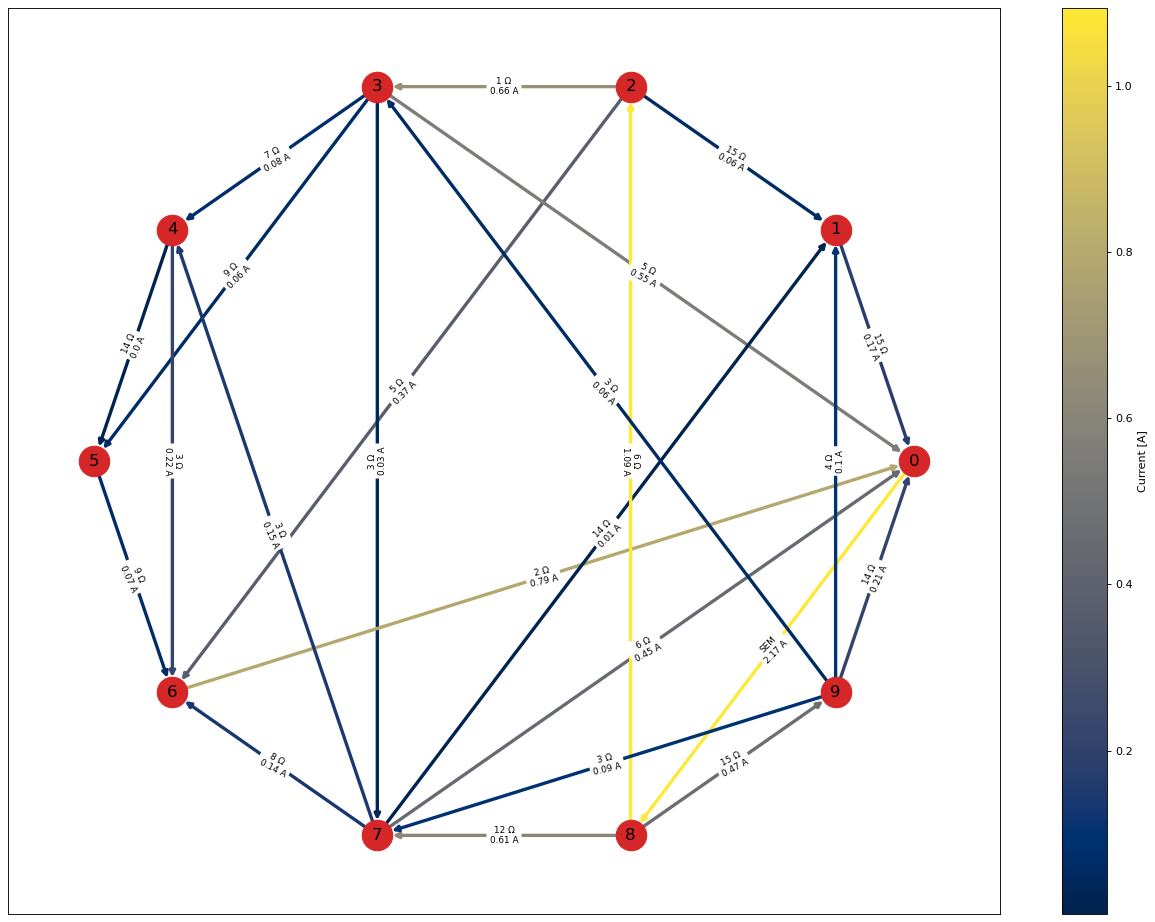

In [15]:
graph_info = graphs['spojny10']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G, graph_info.SEM, nx.circular_layout(G), edge_scaling=False, display_edge_label=True, display_node_numbers=True)

##### Graf spójny losowy o 70 wierzchołkach

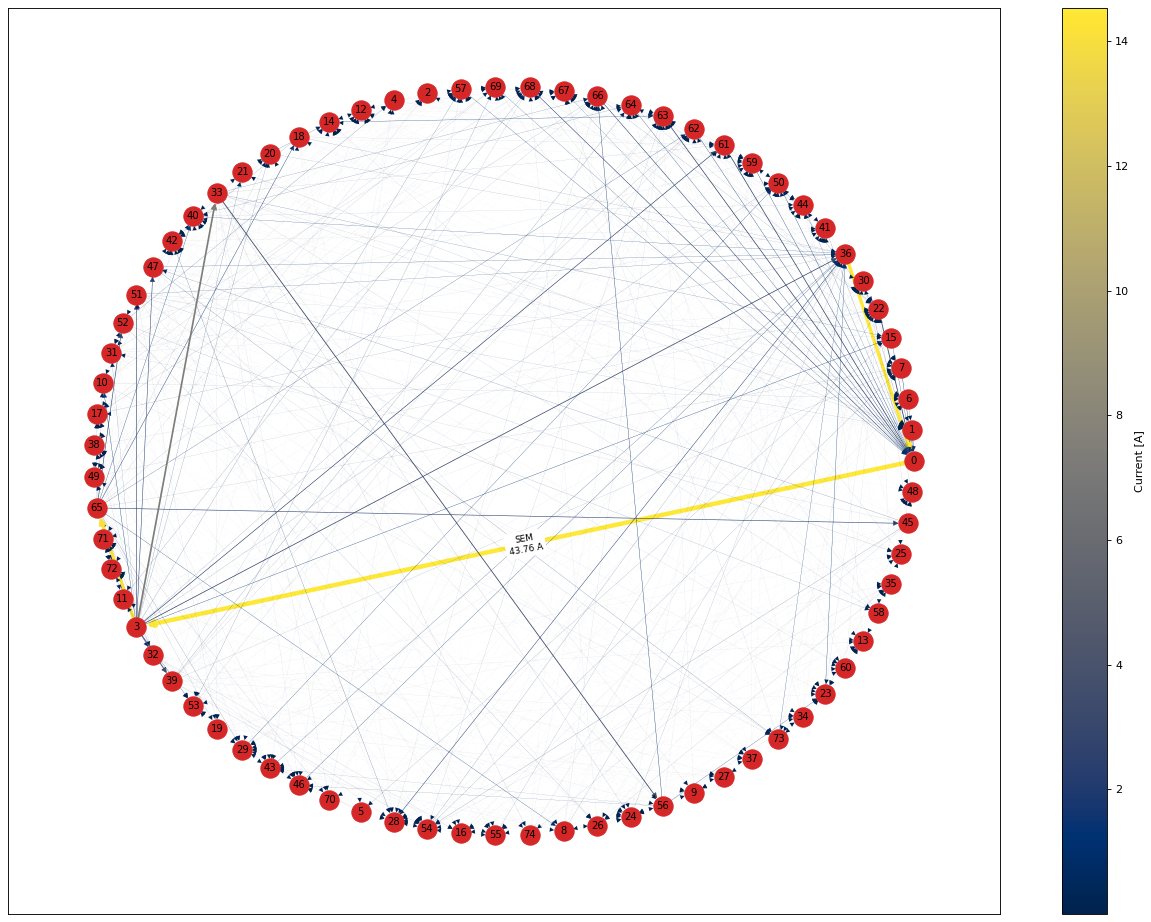

In [16]:
graph_info = graphs['spojny70']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G, graph_info.SEM, nx.circular_layout(G), node_size=300, display_node_numbers=True, font_size=9)

##### Graf spójny losowy o 150 wierzchołkach

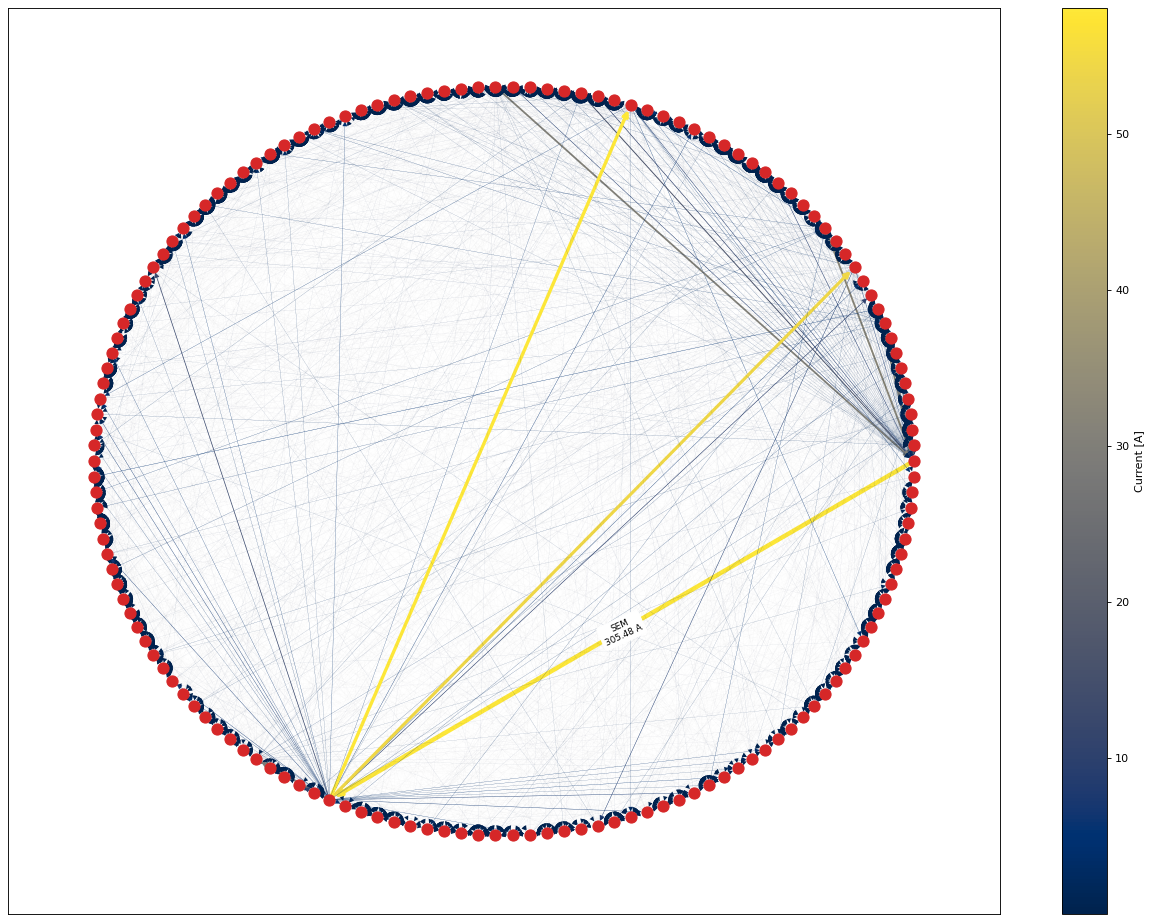

In [17]:
graph_info = graphs['spojny150']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G,graph_info.SEM, nx.circular_layout(G), node_size=100)

##### Graf typu siatka-2d o 16 wierzchołkach z SEM na rogach

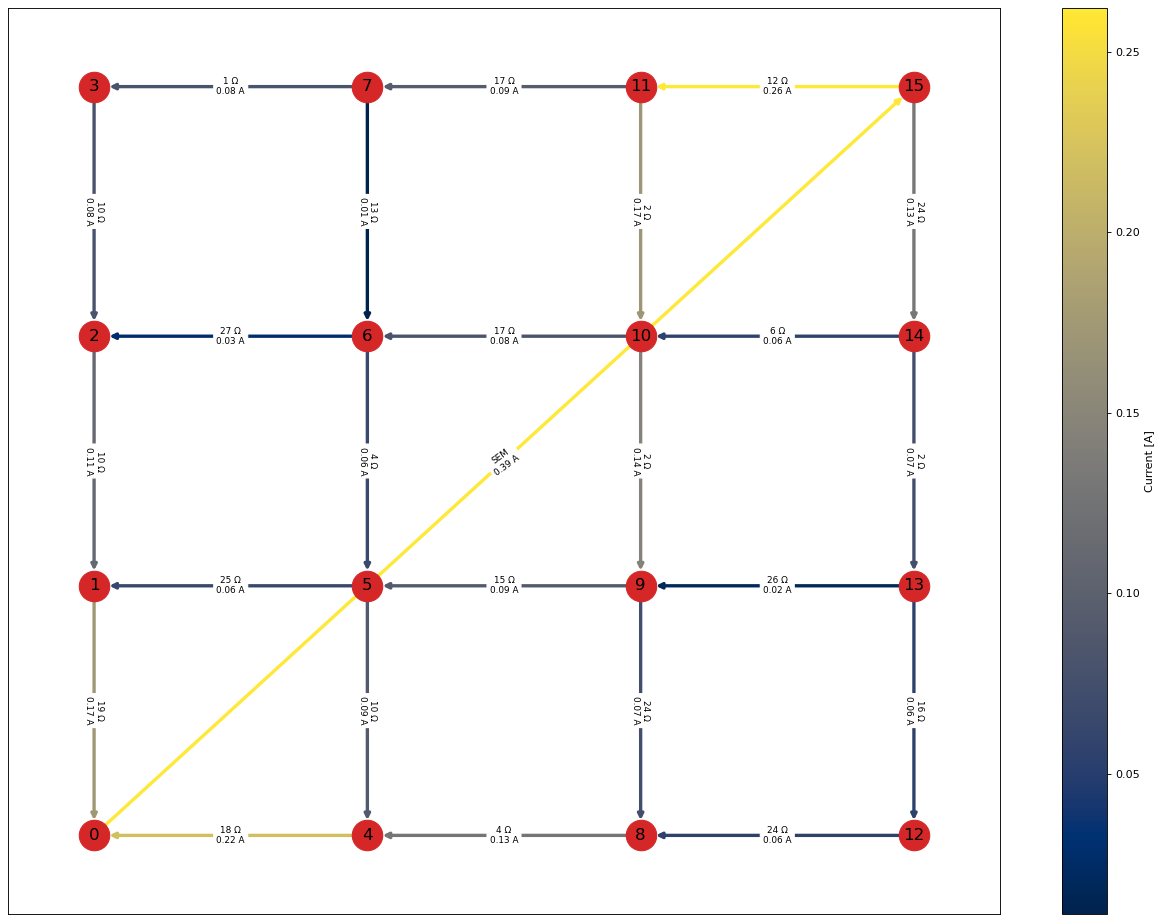

In [18]:
graph_info = graphs['siatka-2D-16']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
pos={i : (i//4, i%4) for i in G.nodes()}
draw_graph(G,graph_info.SEM, pos, display_node_numbers=True, display_edge_label=True, edge_scaling=False)

##### Graf typu siatka-2d o 16 wierzchołkach z SEM w środku

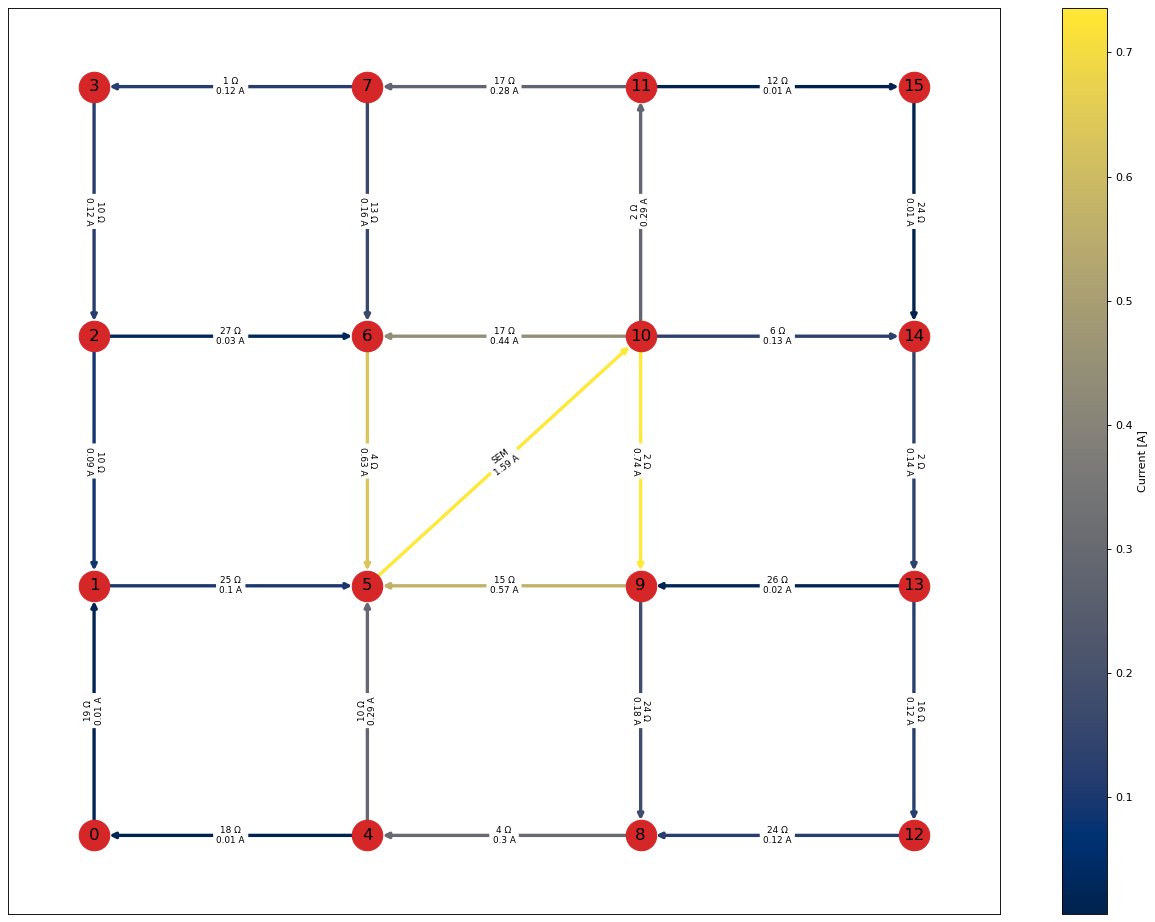

In [19]:
graph_info = graphs['siatka-2D-16central']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
pos={i : (i//4, i%4) for i in G.nodes()}
draw_graph(G,graph_info.SEM, pos, display_node_numbers=True, display_edge_label=True, edge_scaling=False)

##### Graf typu siatka-2d o 100 wierzchołkach na rogach

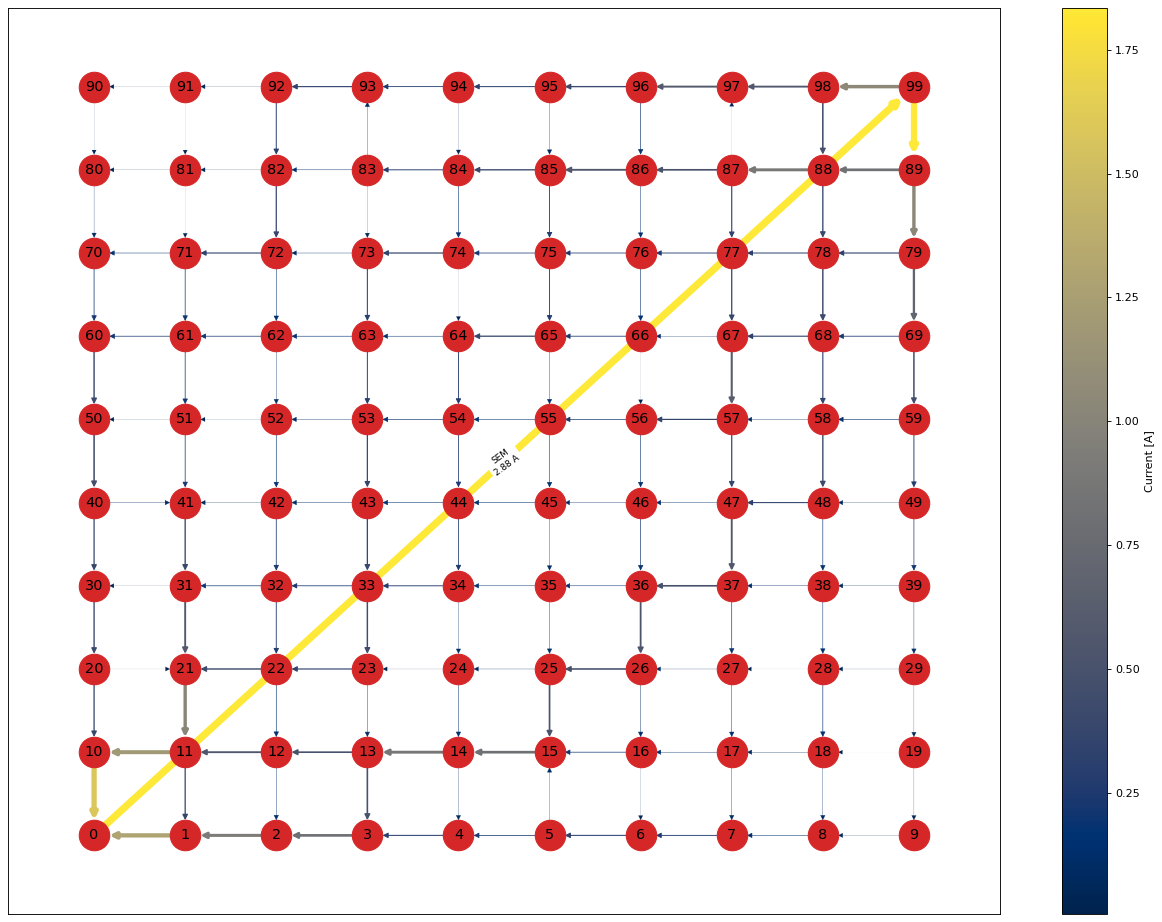

In [47]:
graph_info = graphs['siatka-2D-100']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
pos = {i: (i // 10, i % 10) for i in G.nodes()}
draw_graph(G,graph_info.SEM, pos=pos, max_edge_size=5.5, display_node_numbers=True, font_size=13)

##### Graf typu siatka-2d o 100 wierzchołkach w środku

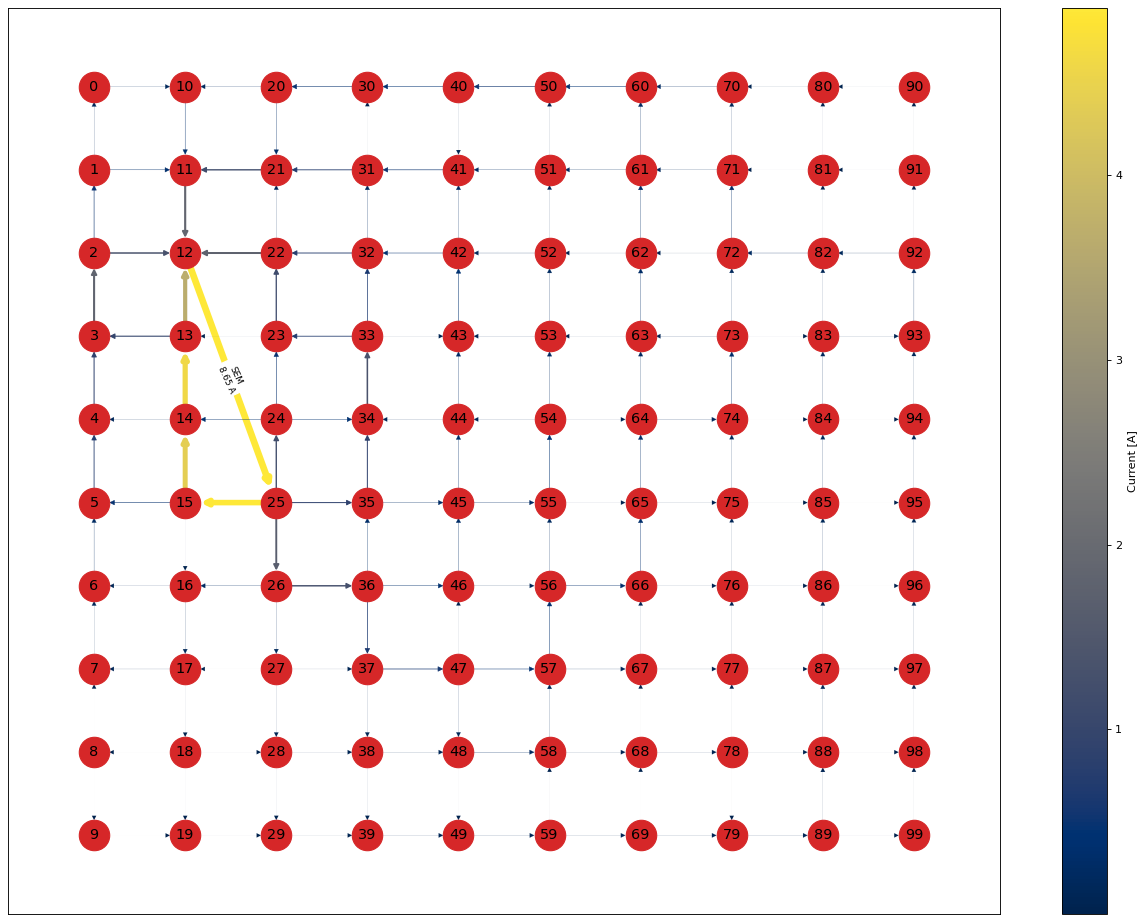

In [45]:
graph_info = graphs['siatka-2D-100central']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
pos = {i: (i // 10, i % 10) for i in G.nodes()}
draw_graph(G,graph_info.SEM, pos=pos, max_edge_size=5, display_node_numbers=True, font_size=13)

##### Graf typu small-world o 10 wierzchołkach

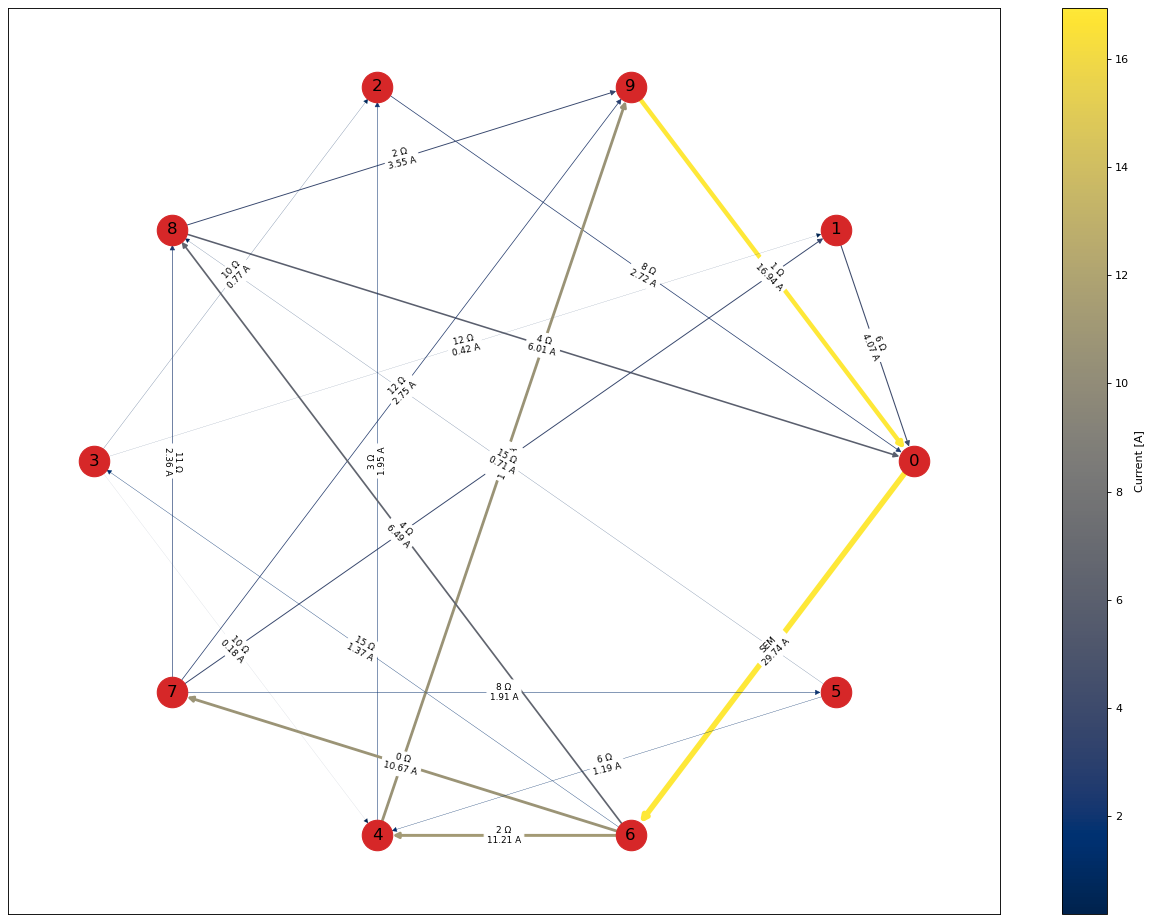

In [22]:
graph_info = graphs['small-world10']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G,graph_info.SEM, pos=nx.circular_layout(G), max_edge_size=4, display_edge_label=True, display_node_numbers=True)

##### Graf typu small-world o 100 wierzchołkach

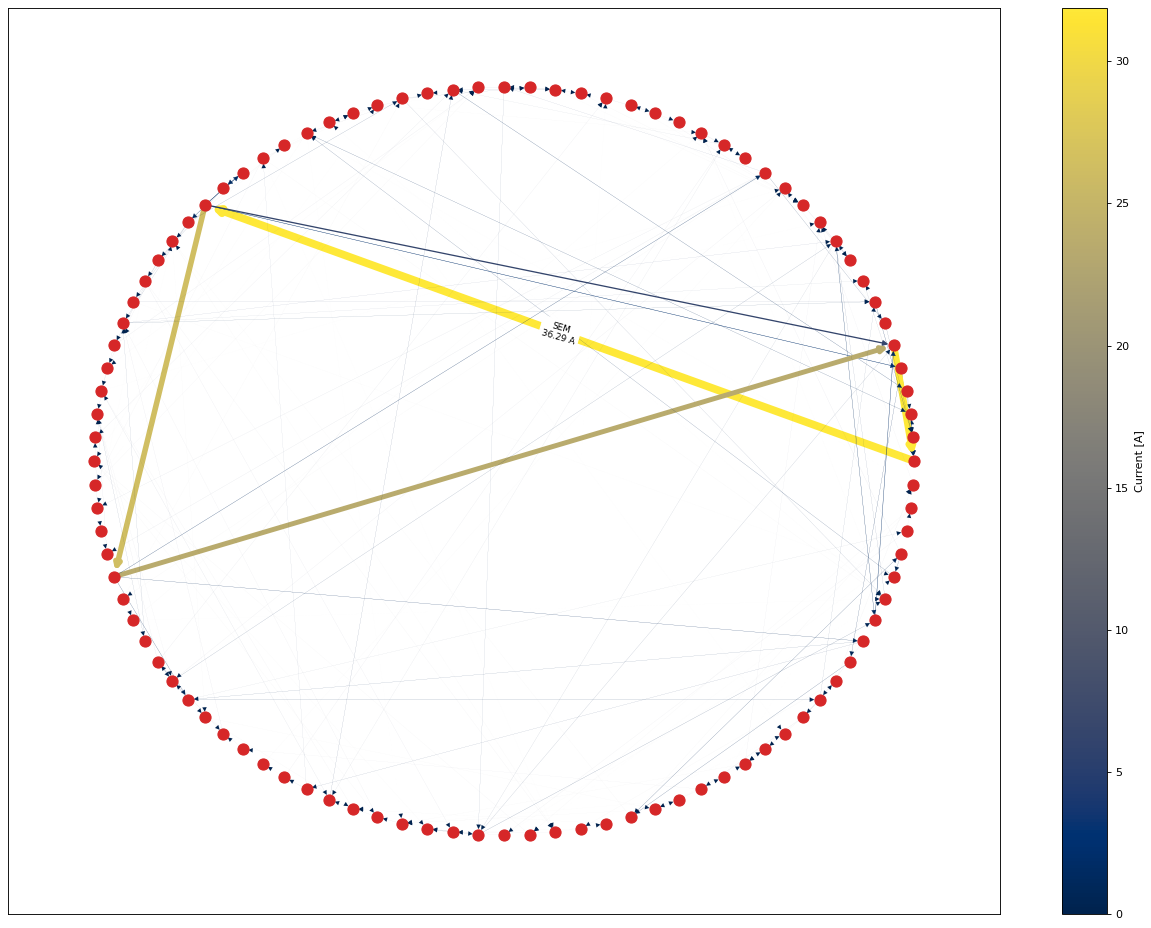

In [23]:
graph_info = graphs['small-world100']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G,graph_info.SEM, pos=nx.circular_layout(G), node_size=100, max_edge_size=6)

##### Graf kubiczny o 20 wierzchołkach

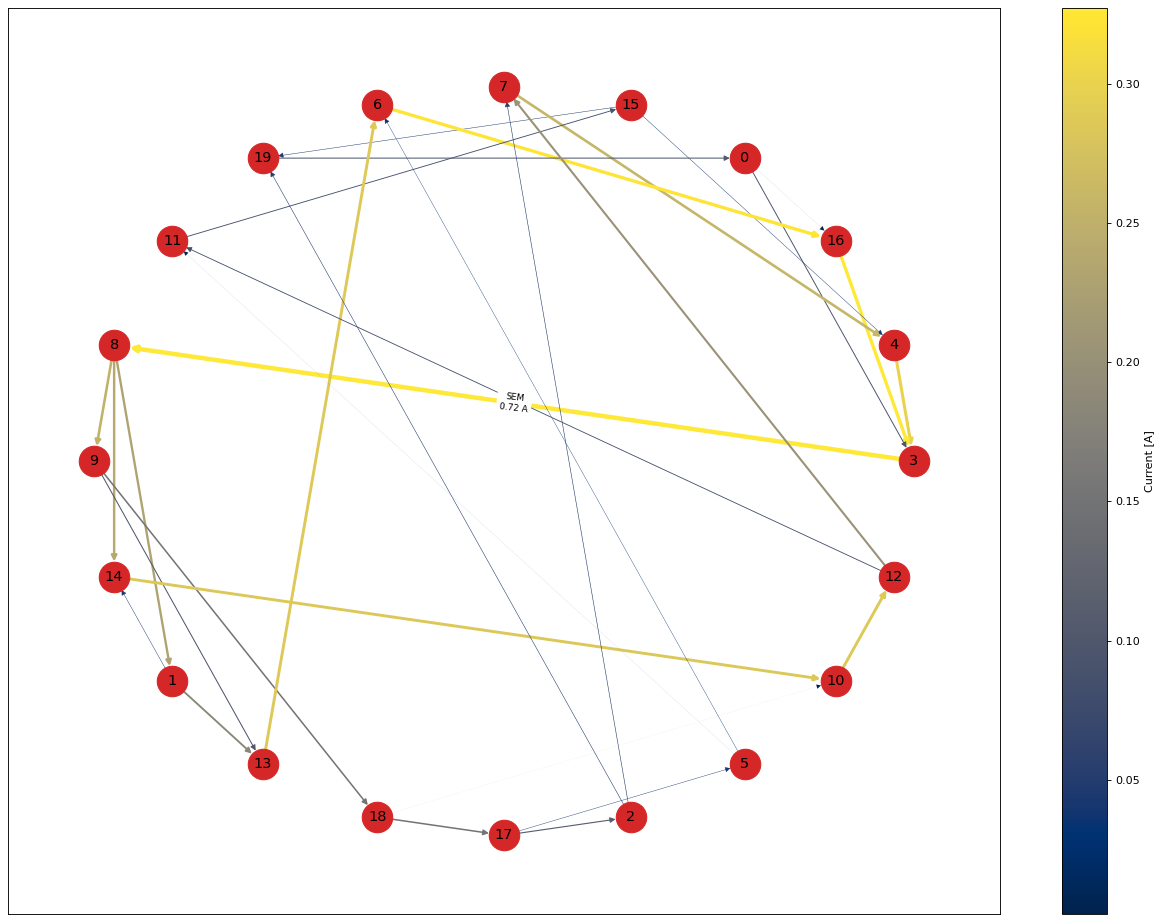

In [24]:
graph_info = graphs['3-regularny20']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G,graph_info.SEM, pos=nx.circular_layout(G), display_node_numbers=True, font_size=13)

##### Graf kubiczny o 76 wierzchołkach

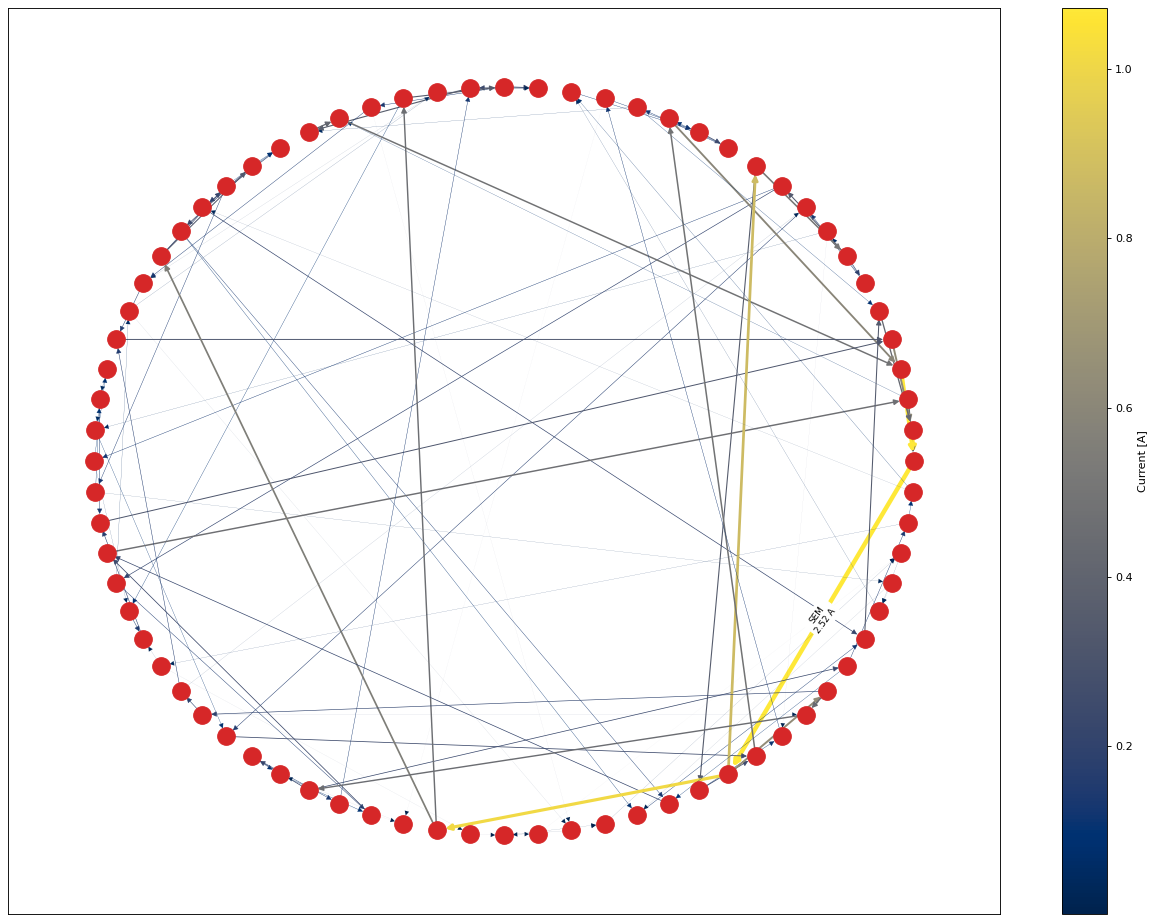

In [25]:
graph_info = graphs['3-regularny76']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G,graph_info.SEM, pos=nx.circular_layout(G), node_size=250)

##### Graf kubiczny o 120 wierzchołkach

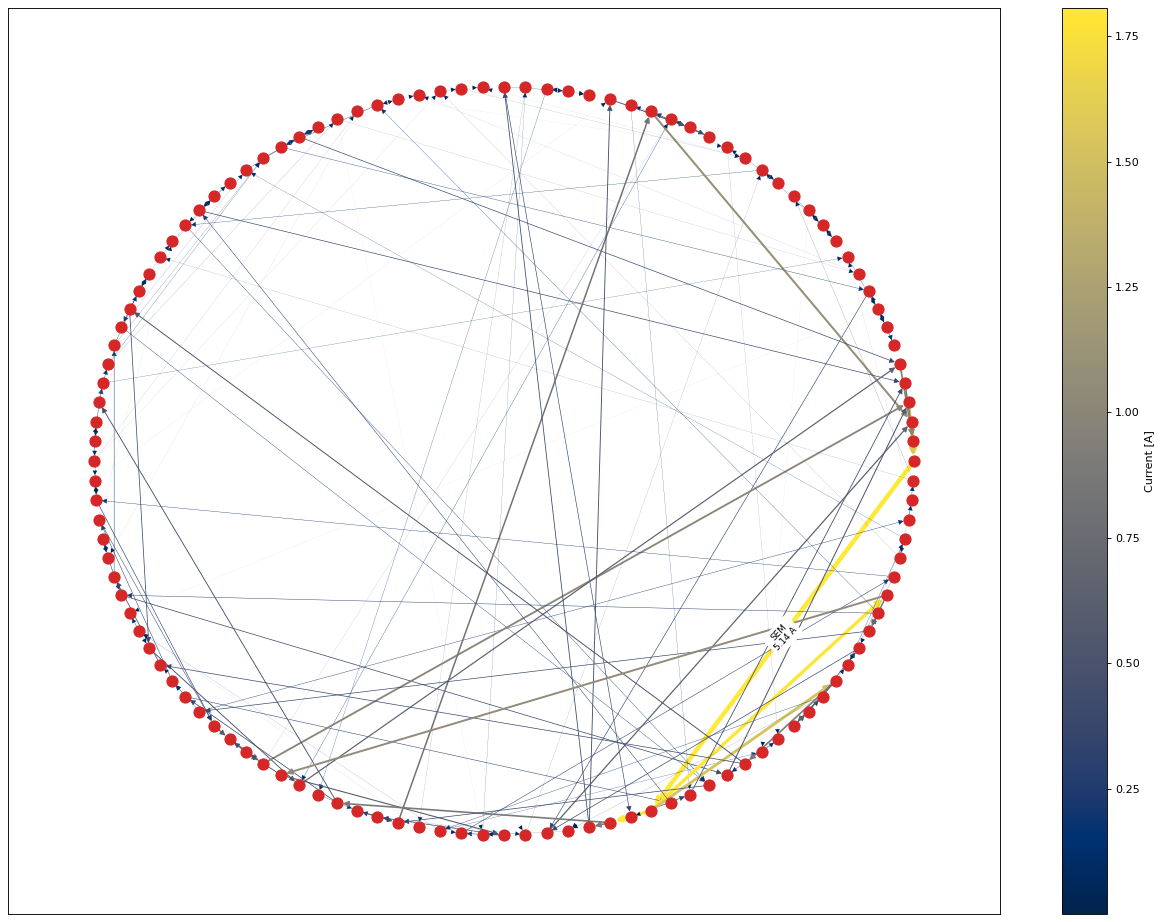

In [26]:
graph_info = graphs['3-regularny120']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G,graph_info.SEM, pos=nx.circular_layout(G), node_size=100)

##### Graf kubiczny o 10 i 16 wierzchołkach połączony mostkiem

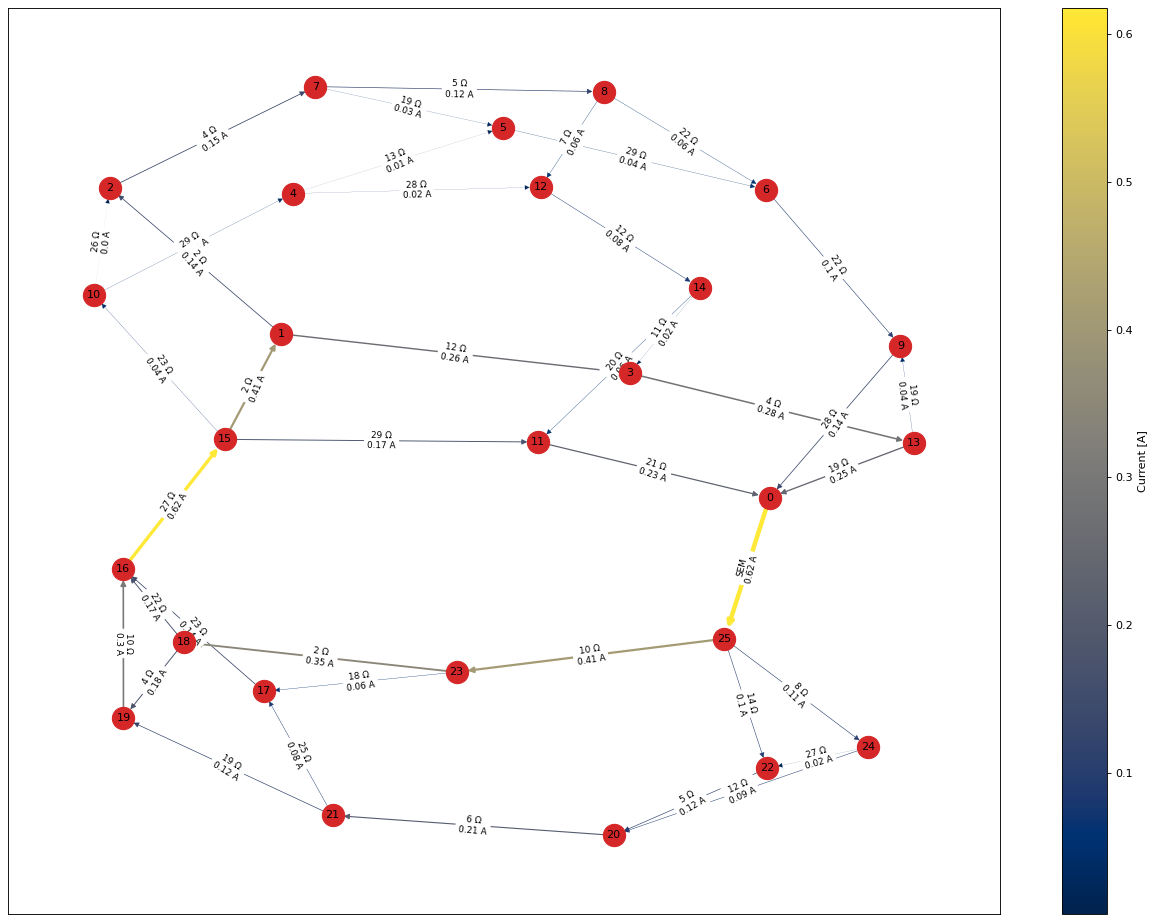

In [27]:
graph_info = graphs['bridge-26']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G,graph_info.SEM, pos=nx.kamada_kawai_layout(G), display_edge_label=True, node_size=400, display_node_numbers=True, font_size=10)

##### 2 grafy kubiczne o 30 wierzchołkach połączone mostkiem

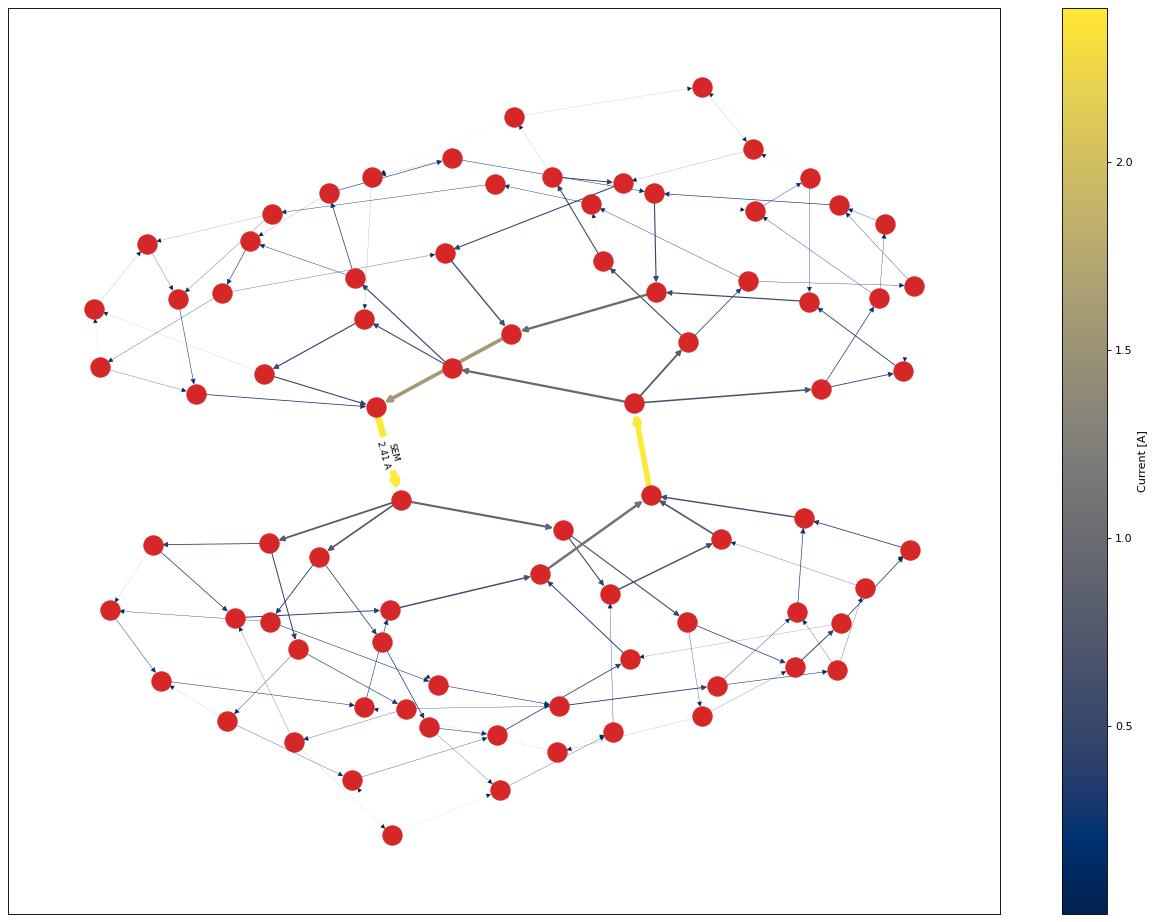

In [28]:
graph_info = graphs['bridge-80']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G,graph_info.SEM, pos=nx.kamada_kawai_layout(G), max_edge_size=5, node_size=300)

##### 2 kliki o 6 wierzchołkach połączone mostkiem

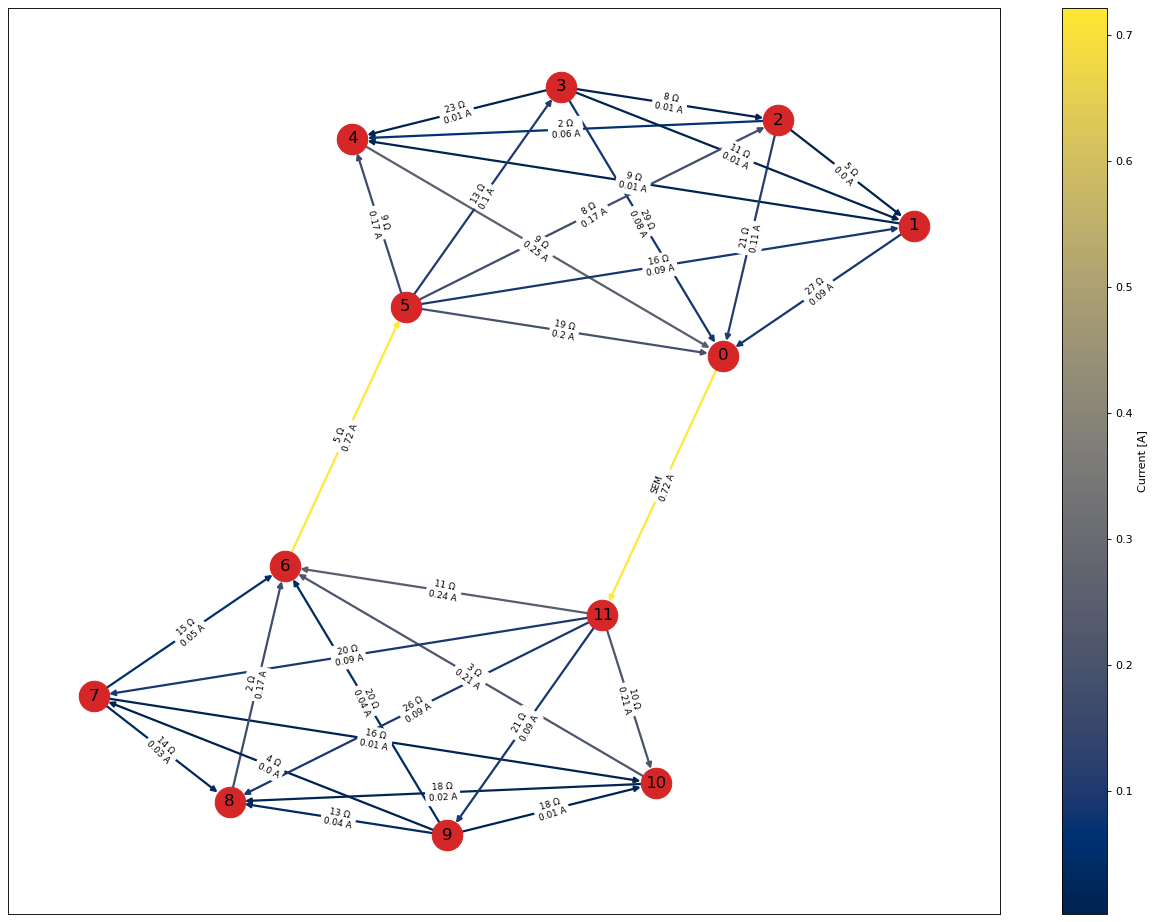

In [29]:
graph_info = graphs['built-in-bridge12']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G,graph_info.SEM, pos=nx.kamada_kawai_layout(G), display_edge_label=True, edge_scaling=False, max_edge_size=2, display_node_numbers=True)

##### 2 kliki o 40 wierzchołkach połączone mostkiem

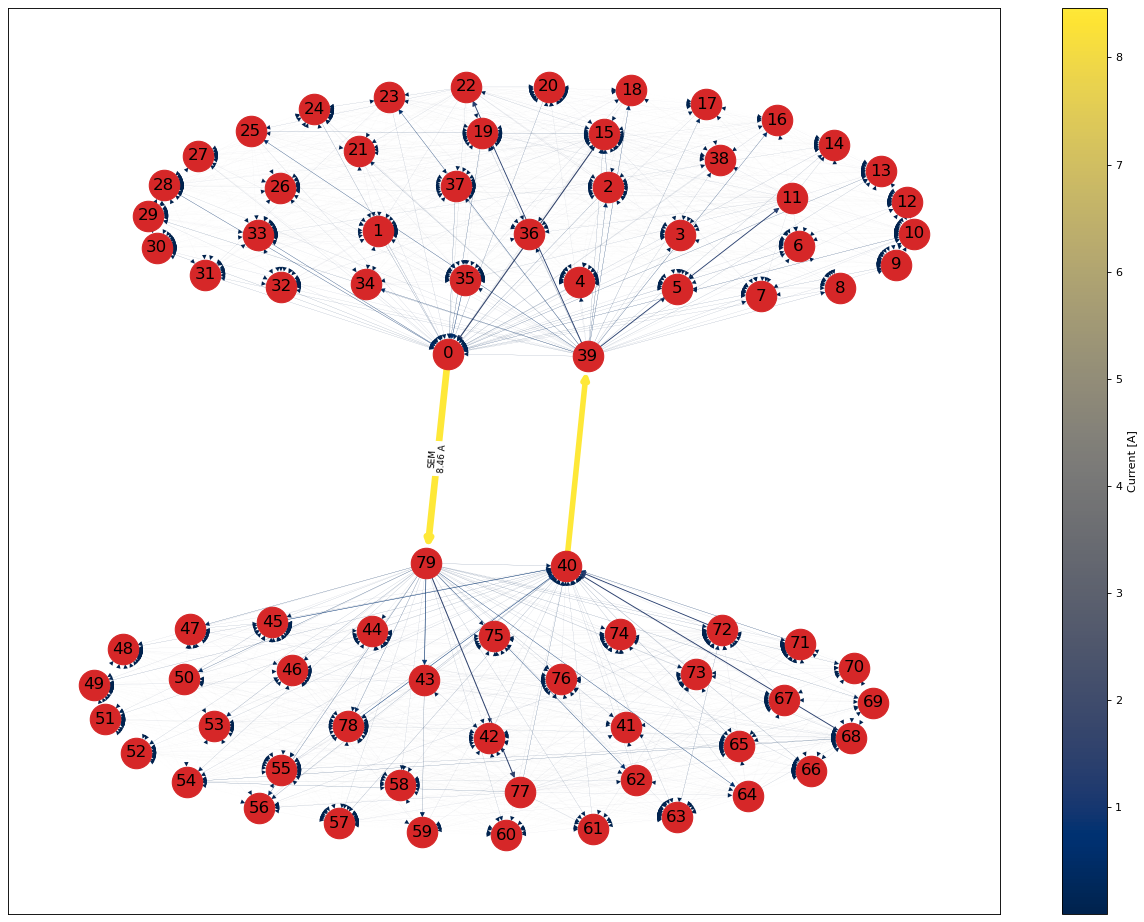

In [30]:
graph_info = graphs['built-in-bridge80']
G = kirchhoff(graph_info)
test_kirchhoff_laws(G, graph_info.SEM)
draw_graph(G,graph_info.SEM, pos=nx.kamada_kawai_layout(G), max_edge_size=5, display_node_numbers=True)

##### Informacje dotyczące działania programu
1. Funkcja *nx.cycle_basis()* została użyta w celu znalezienia cykli potrzebnych w II prawie Kirchhoffa.
2. Najpierw dodawne są równania stworzone z użyciem II prawa Kirchhoffa, później dodawane `liczba krawędzi - liczba cykli` równań z I prawa Kirchhoffa
3. Wstępnie prąd płynie od s do t (czyli od pierwszego podanego wierzchołka do drugiego). W późniejszej częsci rozwiązania, odwracane są krawędzie na których wyszło ujemne natężenie
4. Za każdym razem, po otrzymaniu grafu wynikowego i przed rysowaniem go, odpalane są testy weryfikujące. W przypadku błędu, dostajemy wyjątek przez co graf nie zostaje narysowany

##### Informacje dotyczące rysowania grafów
1. Krawędzie defaultowo są scalowane, tzn im mniejszy prąd płynie przez krawędź tym jest ona cieńsza. Można to zmienić ustawiając `edge_scaling=False`. Dodatkowo można ustawić szerokość największej z krawędzi poprzez zmienną `max_edge_size=2`
2. Etykiety dotyczące natężenia oraz oproności każdej z krawędzi można dodać poprzez ustawienie `display_edge_label=True`. Domyślnie tylko etykie SEM jest pokazywana.
3. Numery każdego wierzchołka można ujawnić używając `display_node_numbers=True` a zmienić rozmiar liczb poprzez `node_size=<size>`